<a href="https://colab.research.google.com/github/arpitarumma/TextMining-/blob/main/TEXTMININGFINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import nltk
# Download NLTK resources if not already installed
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
from google.colab import drive
drive.mount('/content/gdrive')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Mounted at /content/gdrive


In [ ]:
# Load data
df = pd.read_csv('/content/gdrive/MyDrive/DATASETS/articles.csv')
df

,author,claps,reading_time,link,title,text
0,Justin Lee,8.3K,11,https://medium.com/swlh/chatbots-were-the-next...,Chatbots were the next big thing: what happene...,"Oh, how the headlines blared:\nChatbots were T..."
1,Conor Dewey,1.4K,7,https://towardsdatascience.com/python-for-data...,Python for Data Science: 8 Concepts You May Ha...,If you’ve ever found yourself looking up the s...
2,William Koehrsen,2.8K,11,https://towardsdatascience.com/automated-featu...,Automated Feature Engineering in Python – Towa...,Machine learning is increasingly moving from h...
3,Gant Laborde,1.3K,7,https://medium.freecodecamp.org/machine-learni...,Machine Learning: how to go from Zero to Hero ...,If your understanding of A.I. and Machine Lear...
4,Emmanuel Ameisen,935,11,https://blog.insightdatascience.com/reinforcem...,Reinforcement Learning from scratch – Insight ...,Want to learn about applied Artificial Intelli...
...,...,...,...,...,...,...
332,Daniel Simmons,3.4K,8,https://itnext.io/you-can-build-a-neural-netwo...,You can build a neural network in JavaScript e...,Click here to share this article on LinkedIn »...
333,Eugenio Culurciello,2.8K,13,https://towardsdatascience.com/artificial-inte...,"Artificial Intelligence, AI in 2018 and beyond...",These are my opinions on where deep neural net...
334,Devin Soni,5.8K,4,https://towardsdatascience.com/spiking-neural-...,"Spiking Neural Networks, the Next Generation o...",Everyone who has been remotely tuned in to rec...
335,Carlos E. Perez,3.9K,7,https://medium.com/intuitionmachine/neurons-ar...,Surprise! Neurons are Now More Complex than We...,One of the biggest misconceptions around is th...


In [ ]:
df.shape

(337, 6)

In [ ]:
# Check existing column names
print(df.columns)
# Text cleaning function
def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    ps = PorterStemmer()
    tokens = [ps.stem(word) for word in tokens]  # Stemming
    return ' '.join(tokens)


Index(['author', 'claps', 'reading_time', 'link', 'title', 'text'], dtype='object')


In [ ]:
# Apply preprocessing to the 'text' column
df['cleaned_text'] = df['text'].apply(preprocess_text)

# Display the cleaned data
print(df[['text', 'cleaned_text']].head())

                                                text  \
0  Oh, how the headlines blared:\nChatbots were T...   
1  If you’ve ever found yourself looking up the s...   
2  Machine learning is increasingly moving from h...   
3  If your understanding of A.I. and Machine Lear...   
4  Want to learn about applied Artificial Intelli...   

                                        cleaned_text  
0  oh headlin blare chatbot next big thing hope s...  
1  youv ever found look question concept syntax p...  
2  machin learn increasingli move handdesign mode...  
3  understand ai machin learn big question mark b...  
4  want learn appli artifici intellig lead practi...  


In [ ]:
df['cleaned_text'] = df['text'].apply(preprocess_text)

# Display the cleaned data
print(df[['text', 'cleaned_text']].head())





                                                text  \
0  Oh, how the headlines blared:\nChatbots were T...   
1  If you’ve ever found yourself looking up the s...   
2  Machine learning is increasingly moving from h...   
3  If your understanding of A.I. and Machine Lear...   
4  Want to learn about applied Artificial Intelli...   

                                        cleaned_text  
0  oh headlin blare chatbot next big thing hope s...  
1  youv ever found look question concept syntax p...  
2  machin learn increasingli move handdesign mode...  
3  understand ai machin learn big question mark b...  
4  want learn appli artifici intellig lead practi...  


In [ ]:
# Preprocessing with stemming
def preprocess_with_stemming(text):
    ps = PorterStemmer() # Initialize PorterStemmer inside the function
    tokens = word_tokenize(text.lower())
    tokens = [ps.stem(word) for word in tokens]
    return ' '.join(tokens)

In [ ]:
import nltk

nltk.download('wordnet')

# Preprocessing with lemmatization
def preprocess_with_lemmatization(text):
    from nltk.stem import WordNetLemmatizer # Import WordNetLemmatizer
    lemmatizer = WordNetLemmatizer() # Initialize lemmatizer
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

# Apply to dataset
df['stemmed_text'] = df['cleaned_text'].apply(preprocess_with_stemming)
df['lemmatized_text'] = df['cleaned_text'].apply(preprocess_with_lemmatization)
df

[nltk_data] Downloading package wordnet to /root/nltk_data...


,author,claps,reading_time,link,title,text,cleaned_text,stemmed_text,lemmatized_text
0,Justin Lee,8.3K,11,https://medium.com/swlh/chatbots-were-the-next...,Chatbots were the next big thing: what happene...,"Oh, how the headlines blared:\nChatbots were T...",oh headlin blare chatbot next big thing hope s...,oh headlin blare chatbot next big thing hope s...,oh headlin blare chatbot next big thing hope s...
1,Conor Dewey,1.4K,7,https://towardsdatascience.com/python-for-data...,Python for Data Science: 8 Concepts You May Ha...,If you’ve ever found yourself looking up the s...,youv ever found look question concept syntax p...,youv ever found look question concept syntax p...,youv ever found look question concept syntax p...
2,William Koehrsen,2.8K,11,https://towardsdatascience.com/automated-featu...,Automated Feature Engineering in Python – Towa...,Machine learning is increasingly moving from h...,machin learn increasingli move handdesign mode...,machin learn increasingli move handdesign mode...,machin learn increasingli move handdesign mode...
3,Gant Laborde,1.3K,7,https://medium.freecodecamp.org/machine-learni...,Machine Learning: how to go from Zero to Hero ...,If your understanding of A.I. and Machine Lear...,understand ai machin learn big question mark b...,understand ai machin learn big question mark b...,understand ai machin learn big question mark b...
4,Emmanuel Ameisen,935,11,https://blog.insightdatascience.com/reinforcem...,Reinforcement Learning from scratch – Insight ...,Want to learn about applied Artificial Intelli...,want learn appli artifici intellig lead practi...,want learn appli artifici intellig lead practi...,want learn appli artifici intellig lead practi...
...,...,...,...,...,...,...,...,...,...
332,Daniel Simmons,3.4K,8,https://itnext.io/you-can-build-a-neural-netwo...,You can build a neural network in JavaScript e...,Click here to share this article on LinkedIn »...,click share articl linkedin skip part want get...,click share articl linkedin skip part want get...,click share articl linkedin skip part want get...
333,Eugenio Culurciello,2.8K,13,https://towardsdatascience.com/artificial-inte...,"Artificial Intelligence, AI in 2018 and beyond...",These are my opinions on where deep neural net...,opinion deep neural network machin learn head ...,opinion deep neural network machin learn head ...,opinion deep neural network machin learn head ...
334,Devin Soni,5.8K,4,https://towardsdatascience.com/spiking-neural-...,"Spiking Neural Networks, the Next Generation o...",Everyone who has been remotely tuned in to rec...,everyon remot tune recent progress machin lear...,everyon remot tune recent progress machin lear...,everyon remot tune recent progress machin lear...
335,Carlos E. Perez,3.9K,7,https://medium.com/intuitionmachine/neurons-ar...,Surprise! Neurons are Now More Complex than We...,One of the biggest misconceptions around is th...,one biggest misconcept around idea deep learn ...,one biggest misconcept around idea deep learn ...,one biggest misconcept around idea deep learn ...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Apply TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=100, stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_text'])

# Get feature names and scores
tfidf_scores = X_tfidf.toarray()
tfidf_words = tfidf_vectorizer.get_feature_names_out()
# Print the feature names (words considered in TF-IDF)
print("TF-IDF Words (Features):")
print(tfidf_words)

TF-IDF Words (Features):
['actual' 'ai' 'algorithm' 'articl' 'base' 'best' 'better' 'build' 'case'
 'chang' 'code' 'come' 'compani' 'comput' 'cours' 'creat' 'data' 'deep'
 'develop' 'differ' 'dont' 'engin' 'everi' 'exampl' 'experi' 'featur'
 'follow' 'function' 'futur' 'game' 'gener' 'good' 'googl' 'help' 'human'
 'idea' 'imag' 'import' 'inform' 'input' 'intellig' 'know' 'languag'
 'layer' 'learn' 'let' 'like' 'look' 'lot' 'machin' 'make' 'mani' 'mean'
 'model' 'need' 'network' 'neural' 'new' 'number' 'output' 'peopl'
 'perform' 'person' 'point' 'possibl' 'post' 'power' 'predict' 'probabl'
 'problem' 'process' 'program' 'realli' 'research' 'result' 'right' 'run'
 'say' 'scienc' 'set' 'simpl' 'start' 'step' 'stori' 'technolog' 'thing'
 'think' 'time' 'train' 'tri' 'understand' 'use' 'valu' 'want' 'way'
 'weight' 'word' 'work' 'world' 'year']


In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'df' is your DataFrame and 'cleaned_text' is the column with preprocessed text
docs_text = df['cleaned_text'].tolist()  # Convert the 'cleaned_text' column to a list

vectorizer = TfidfVectorizer(min_df=5, stop_words='english', ngram_range=(1, 3))  # 1 to 3 words in n-grams

# Fit the vectorizer to the text data
tfidf_matrix = vectorizer.fit_transform(docs_text)

# Extract the feature names (n-grams)
terms = vectorizer.get_feature_names_out()

# Compute the top terms by sorting their TF-IDF scores
tfidf_sorting = np.argsort(tfidf_matrix.toarray().sum(axis=0))[::-1]  # Sum across all documents and sort descending

# Select the top N n-grams
n = 30
top_n = np.array(terms)[tfidf_sorting][:n]

# Print the top N n-grams
print("Top N-Grams by TF-IDF Score:")
for i, term in enumerate(top_n, start=1):
    print(f"{i}: {term}")

Top N-Grams by TF-IDF Score:
1: learn
2: use
3: network
4: data
5: model
6: train
7: neural
8: machin
9: imag
10: like
11: ai
12: neural network
13: layer
14: machin learn
15: human
16: time
17: work
18: comput
19: make
20: deep
21: intellig
22: algorithm
23: function
24: need
25: new
26: gener
27: way
28: peopl
29: input
30: neuron


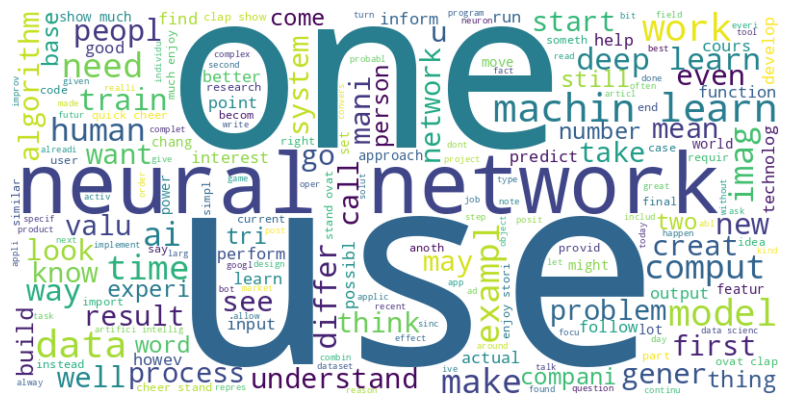

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
#WORDCLOUD

word_counts = Counter(" ".join(df['cleaned_text']).split())
most_common_words = word_counts.most_common(20)

# Plotting word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(df['cleaned_text']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
#NGRAMS


# Generate bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
X_bigrams = vectorizer.fit_transform(df['cleaned_text'])

# Get the 10 most common bigrams
bigram_counts = Counter(vectorizer.get_feature_names_out())
print(bigram_counts.most_common(10))

[('__ entir', 1), ('__ time', 1), ('_bercy_ founder', 1), ('_get_reward addit', 1), ('aa tell', 1), ('aaand network', 1), ('aaauu_ll_lllooo step', 1), ('aae learn', 1), ('aah um', 1), ('aarhu univers', 1)]


Most Common Words:
learn: 3560
use: 3424
data: 2580
network: 2493
like: 1981
one: 1959
machin: 1855
model: 1657
train: 1611
neural: 1504
imag: 1478
time: 1469
work: 1379
make: 1359
comput: 1278
would: 1247
ai: 1216
human: 1201
also: 1178
get: 1156


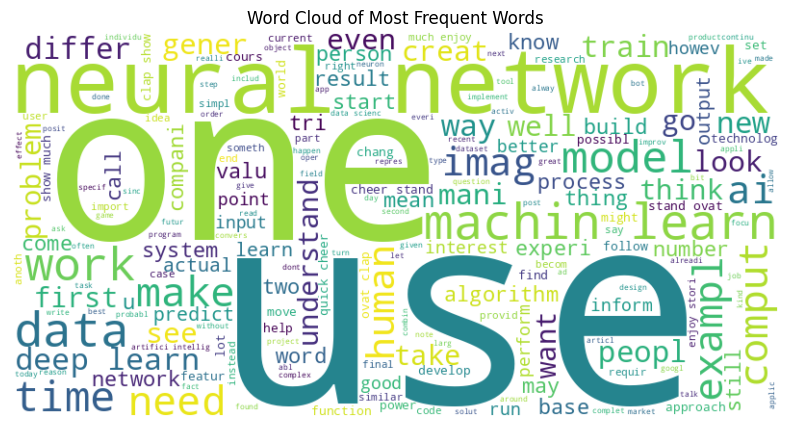

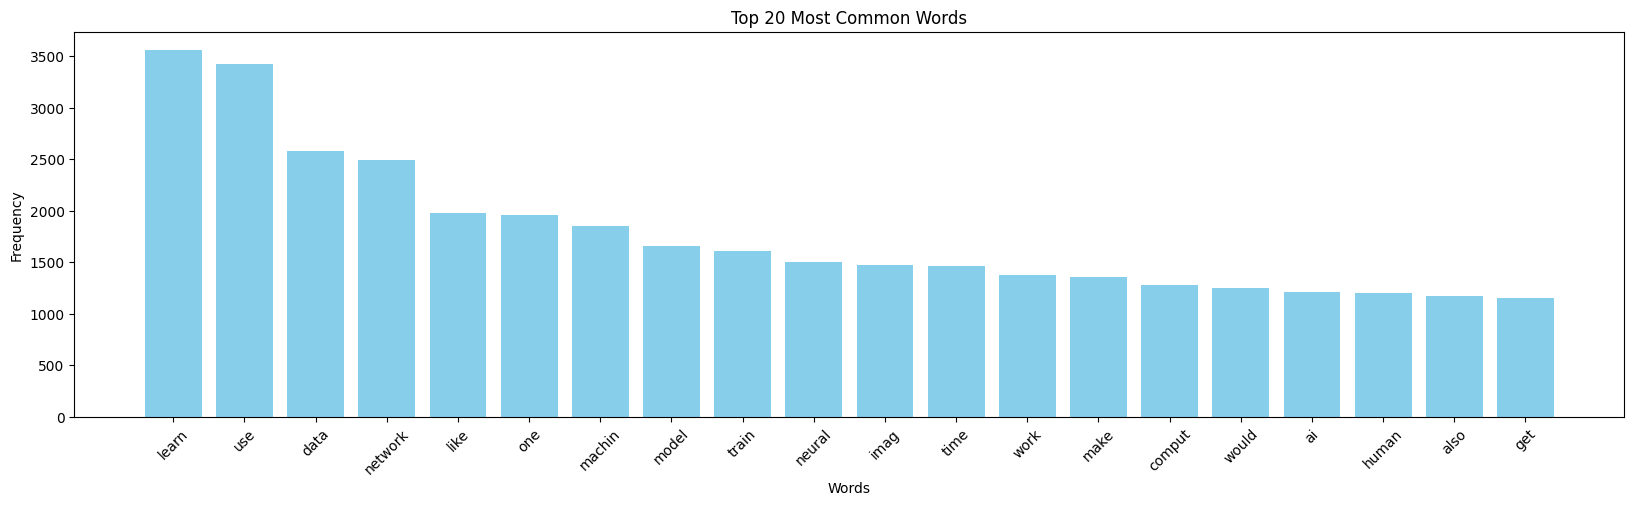

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Combine all text in the cleaned_text column into a single string
all_words = ' '.join(df['cleaned_text'])

# Tokenize and count word frequencies
word_counts = Counter(all_words.split())

# Display the most common words
print("Most Common Words:")
most_common_words = word_counts.most_common(20)  # Top 20 words
for word, count in most_common_words:
    print(f"{word}: {count}")

# Generate a Word Cloud for Visualization
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Frequent Words')
plt.show()

# Bar Plot of Top Words
words, counts = zip(*most_common_words)
plt.figure(figsize=(20, 5))
plt.bar(words, counts, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common Words')
plt.xticks(rotation=45)
plt.show()


In [ ]:
from collections import Counter

# Combine all text into one large string
all_words = ' '.join(df['cleaned_text'])

# Count word frequencies
word_counts = Counter(all_words.split())

# Display the most common words
print(word_counts.most_common(10))


[('learn', 3560), ('use', 3424), ('data', 2580), ('network', 2493), ('like', 1981), ('one', 1959), ('machin', 1855), ('model', 1657), ('train', 1611), ('neural', 1504)]


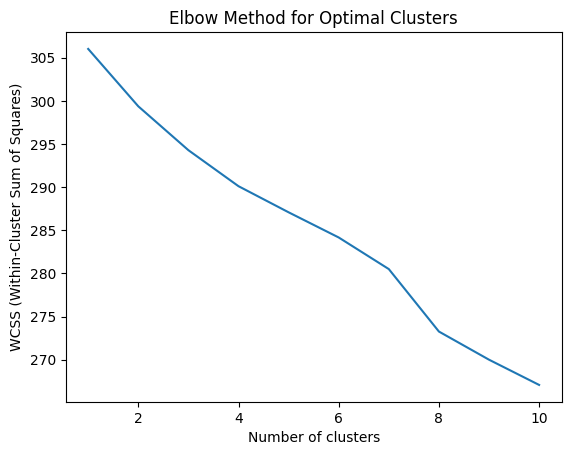

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer # Import TfidfVectorizer


# Assuming 'df' is your DataFrame and 'cleaned_text' is the column with text data
vectorizer = TfidfVectorizer(stop_words='english') # Initialize TfidfVectorizer
X = vectorizer.fit_transform(df['cleaned_text']) # Create feature matrix X


# Using Elbow Method to find the optimal number of clusters
wcss = []
for i in range(1, 11):  # Trying cluster numbers from 1 to 10
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal Clusters')
plt.show()
# Set the optimal number of clusters based on the Elbow Method plot
optimal_clusters = 3  # Replace with the number you choose from the plot

# Perform K-Means clustering with optimal clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
y_kmeans = kmeans.fit_predict(X)

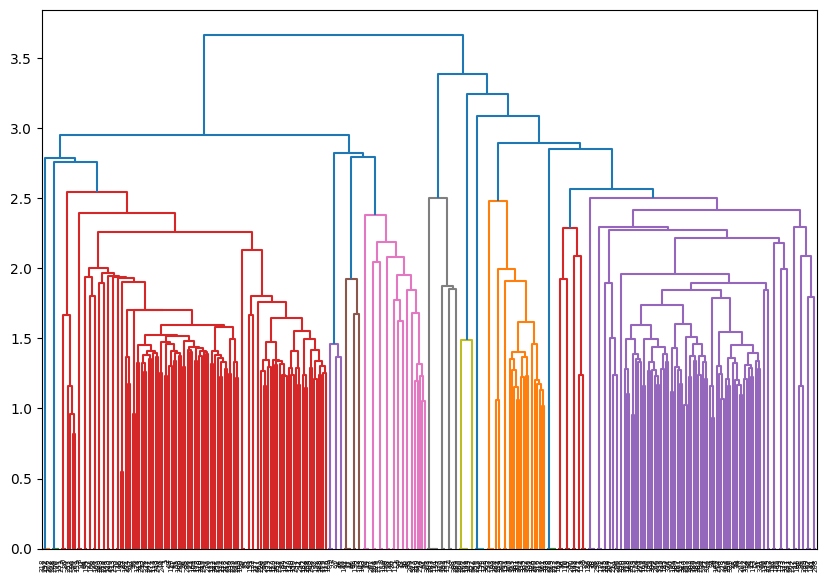

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(X.toarray(), method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.show()


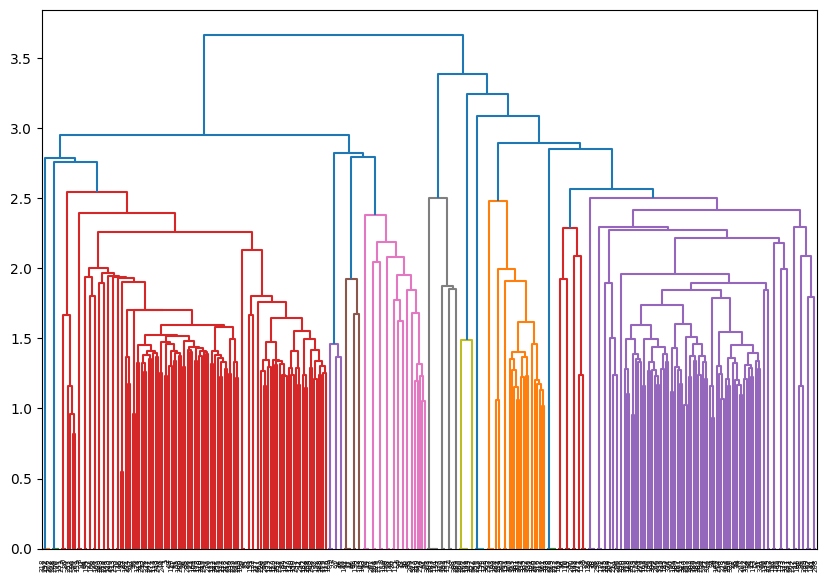

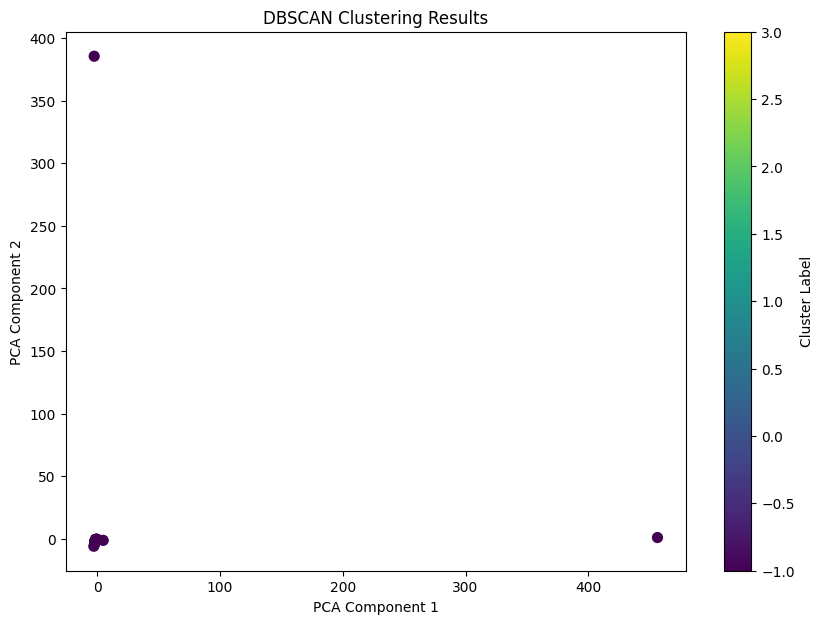

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(X.toarray(), method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.show()
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler



 # Assuming 'text' is the column to cluster

# Standardize the data for DBSCAN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.toarray())

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust parameters as needed
dbscan_labels = dbscan.fit_predict(X_scaled)

# Add the cluster labels to the dataframe
df['dbscan_cluster'] = dbscan_labels

# Use PCA for 2D visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

# Plot the clusters
plt.figure(figsize=(10, 7))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=dbscan_labels, cmap='viridis', s=50, marker='o')
plt.colorbar(label='Cluster Label')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('DBSCAN Clustering Results')
plt.show()


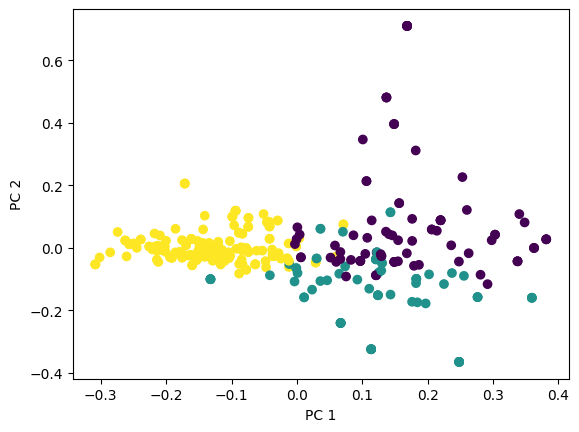

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X.toarray())
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_kmeans)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score  # Import the function
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['cleaned_text'])

# Apply clustering (e.g., K-Means)
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

# Calculate evaluation metrics
sil_score = silhouette_score(X, labels)
dbi_score = davies_bouldin_score(X.toarray(), labels)
ch_score = calinski_harabasz_score(X.toarray(), labels)  # Now you can call the function

print(f"Silhouette Score: {sil_score}")
print(f"Davies-Bouldin Index: {dbi_score}")
print(f"Calinski-Harabasz Index: {ch_score}")

Silhouette Score: 0.019504971898651656
Davies-Bouldin Index: 5.50849695146249
Calinski-Harabasz Index: 6.6585311428473


In [ ]:
# Evaluation metrics for dbscan
# Import the necessary function
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Calculate evaluation metrics for DBSCAN
sil_score_dbscan = silhouette_score(X_scaled, dbscan_labels)
dbi_score_dbscan = davies_bouldin_score(X_scaled, dbscan_labels)
ch_score_dbscan = calinski_harabasz_score(X_scaled, dbscan_labels)

print(f"Silhouette Score for DBSCAN: {sil_score_dbscan}")
print(f"Davies-Bouldin Index for DBSCAN: {dbi_score_dbscan}")
print(f"Calinski-Harabasz Index for DBSCAN: {ch_score_dbscan}")







Silhouette Score for DBSCAN: -0.1648439998641779
Davies-Bouldin Index for DBSCAN: 1.768229650903893
Calinski-Harabasz Index for DBSCAN: 1.7776417812974636


In [ ]:
# Evaluation metrics for hierarchial clustering
# Calculate evaluation metrics for hierarchical clustering
sil_score_hierarchical = silhouette_score(X, y_kmeans)
dbi_score_hierarchical = davies_bouldin_score(X.toarray(), y_kmeans)
ch_score_hierarchical = calinski_harabasz_score(X.toarray(), y_kmeans)

print(f"Silhouette Score for Hierarchical Clustering: {sil_score_hierarchical}")
print(f"Davies-Bouldin Index for Hierarchical Clustering: {dbi_score_hierarchical}")
print(f"Calinski-Harabasz Index for Hierarchical Clustering: {ch_score_hierarchical}")

Silhouette Score for Hierarchical Clustering: 0.019504971898651656
Davies-Bouldin Index for Hierarchical Clustering: 5.50849695146249
Calinski-Harabasz Index for Hierarchical Clustering: 6.6585311428473
